In [1]:
import json
import numpy as np
import openslide

In [2]:
oslide = openslide.OpenSlide("TCGA-2J-AABT-01Z-00-DX1.656FAA7A-48B3-4602-950D-11DCDEF885F6.svs")

In [3]:
with open("17061.json") as f:
    DATA = json.load(f)

In [4]:
# referenced
# https://github.com/david-belinsky-sbu/Dataset_Tools/blob/7a192b40b3c55b2e814433dfca5d485612bb90f2/Fully_Annotated_Dataset_Creation/feature_extraction_from_manual_annotation.py#L205-L211
def get_human_bounding_boxes(json_data, label_name: str, slide_size: (int, int)):
    """Return shapely Polygons of the human bounding boxes."""
    bboxes = [b for b in json_data if b["properties"]["annotations"]["notes"].lower() == label_name.lower()]
    slide_x, slide_y = slide_size[0], slide_size[1]
    polygons = []
    for this_bbox in bboxes:
        this_bbox = this_bbox["geometries"]["features"][0]
        this_bbox_xsize = this_bbox["properties"]["size"][0] * slide_x
        this_bbox_ysize = this_bbox["properties"]["size"][1] * slide_y
        coords = this_bbox["geometry"]["coordinates"][0]
        x0 = max(coords, key=lambda x: x[0])[0] * slide_x
        y0 = max(coords, key=lambda x: x[1])[1] * slide_y
        x1 = x0 + this_bbox_xsize
        y1 = y0 + this_bbox_ysize
        x0, y0, x1, y1 = int(x0), int(y0), int(x1), int(y1)
        polygons.append([(x0, y0), (x1, y1)])
    return polygons

In [5]:
bboxes = get_human_bounding_boxes(DATA, label_name="Waqas 500p Non-Tumor 500p", slide_size=oslide.dimensions)

In [6]:
bboxes[0]

[(14500, 51000), (15000, 51500)]

In [7]:
def plot_one(bbox, slide: openslide.OpenSlide):
    (x0, y0), (x1, y1) = bbox
    return slide.read_region((x0, y0), level=0, size=(x1-x0, y1-y0))

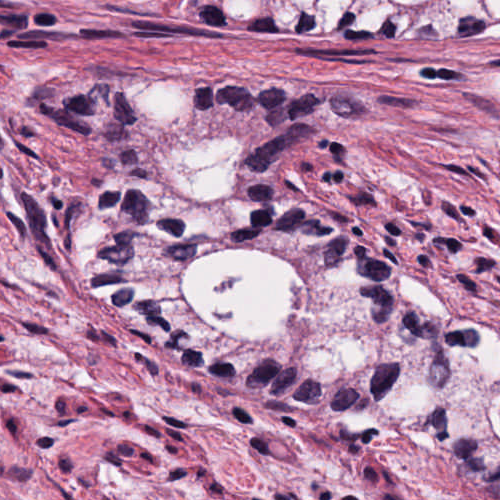

In [8]:
plot_one(bboxes[0], oslide)